## 2.1 Import Data and Required packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



#### Import the CSV data as Pandas Dataframe



In [6]:
df=pd.read_csv('Loan.csv')

In [8]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [9]:
df.shape

(20000, 36)

#### Check Missing Values

In [10]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

#### There are no missing values in the dataset

#### Check duplicates

In [11]:
df.duplicated().sum()

0

#### There are no duplicates in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

#### Checking the number of unique values of each column

In [13]:
df.nunique()

ApplicationDate               20000
Age                              63
AnnualIncome                  17516
CreditScore                     322
EmploymentStatus                  3
EducationLevel                    5
Experience                       62
LoanAmount                    15578
LoanDuration                     10
MaritalStatus                     4
NumberOfDependents                6
HomeOwnershipStatus               4
MonthlyDebtPayments            1299
CreditCardUtilizationRate     20000
NumberOfOpenCreditLines          14
NumberOfCreditInquiries           8
DebtToIncomeRatio             20000
BankruptcyHistory                 2
LoanPurpose                       5
PreviousLoanDefaults              2
PaymentHistory                   38
LengthOfCreditHistory            29
SavingsAccountBalance          9199
CheckingAccountBalance         5151
TotalAssets                   18814
TotalLiabilities              17163
MonthlyIncome                 17489
UtilityBillsPaymentHistory  

#### Check statistics

In [14]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


#### Exploring Data

In [21]:
# define numerical and categorical columns

numeric_features= [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print('We have {} numerical features: {}'. format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'. format(len(categorical_features), categorical_features))

We have 30 numerical features: ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
We have 6 categorical features: ['ApplicationDate', 'EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


In [22]:
print("Categories in 'EmploymentStatus' variable:", end=" ")
print(df["EmploymentStatus"].unique())

print("Categories in 'EducationLevel' variable:", end=" ")
print(df["EducationLevel"].unique())

print("Categories in 'MaritalStatus' variable:", end=" ")
print(df["MaritalStatus"].unique())

print("Categories in 'HomeOwnershipStatus' variable:", end=" ")
print(df["HomeOwnershipStatus"].unique())

print("Categories in 'LoanPurpose' variable:", end=" ")
print(df["LoanPurpose"].unique())


Categories in 'EmploymentStatus' variable: ['Employed' 'Self-Employed' 'Unemployed']
Categories in 'EducationLevel' variable: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
Categories in 'MaritalStatus' variable: ['Married' 'Single' 'Divorced' 'Widowed']
Categories in 'HomeOwnershipStatus' variable: ['Own' 'Mortgage' 'Rent' 'Other']
Categories in 'LoanPurpose' variable: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [29]:
df[numeric_features].corr()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,...,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,...,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,...,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,...,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,...,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,...,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,...,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001717,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,...,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,-0.070415,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,...,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,-0.010466,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,...,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,-0.004769,0.007762


<Axes: >

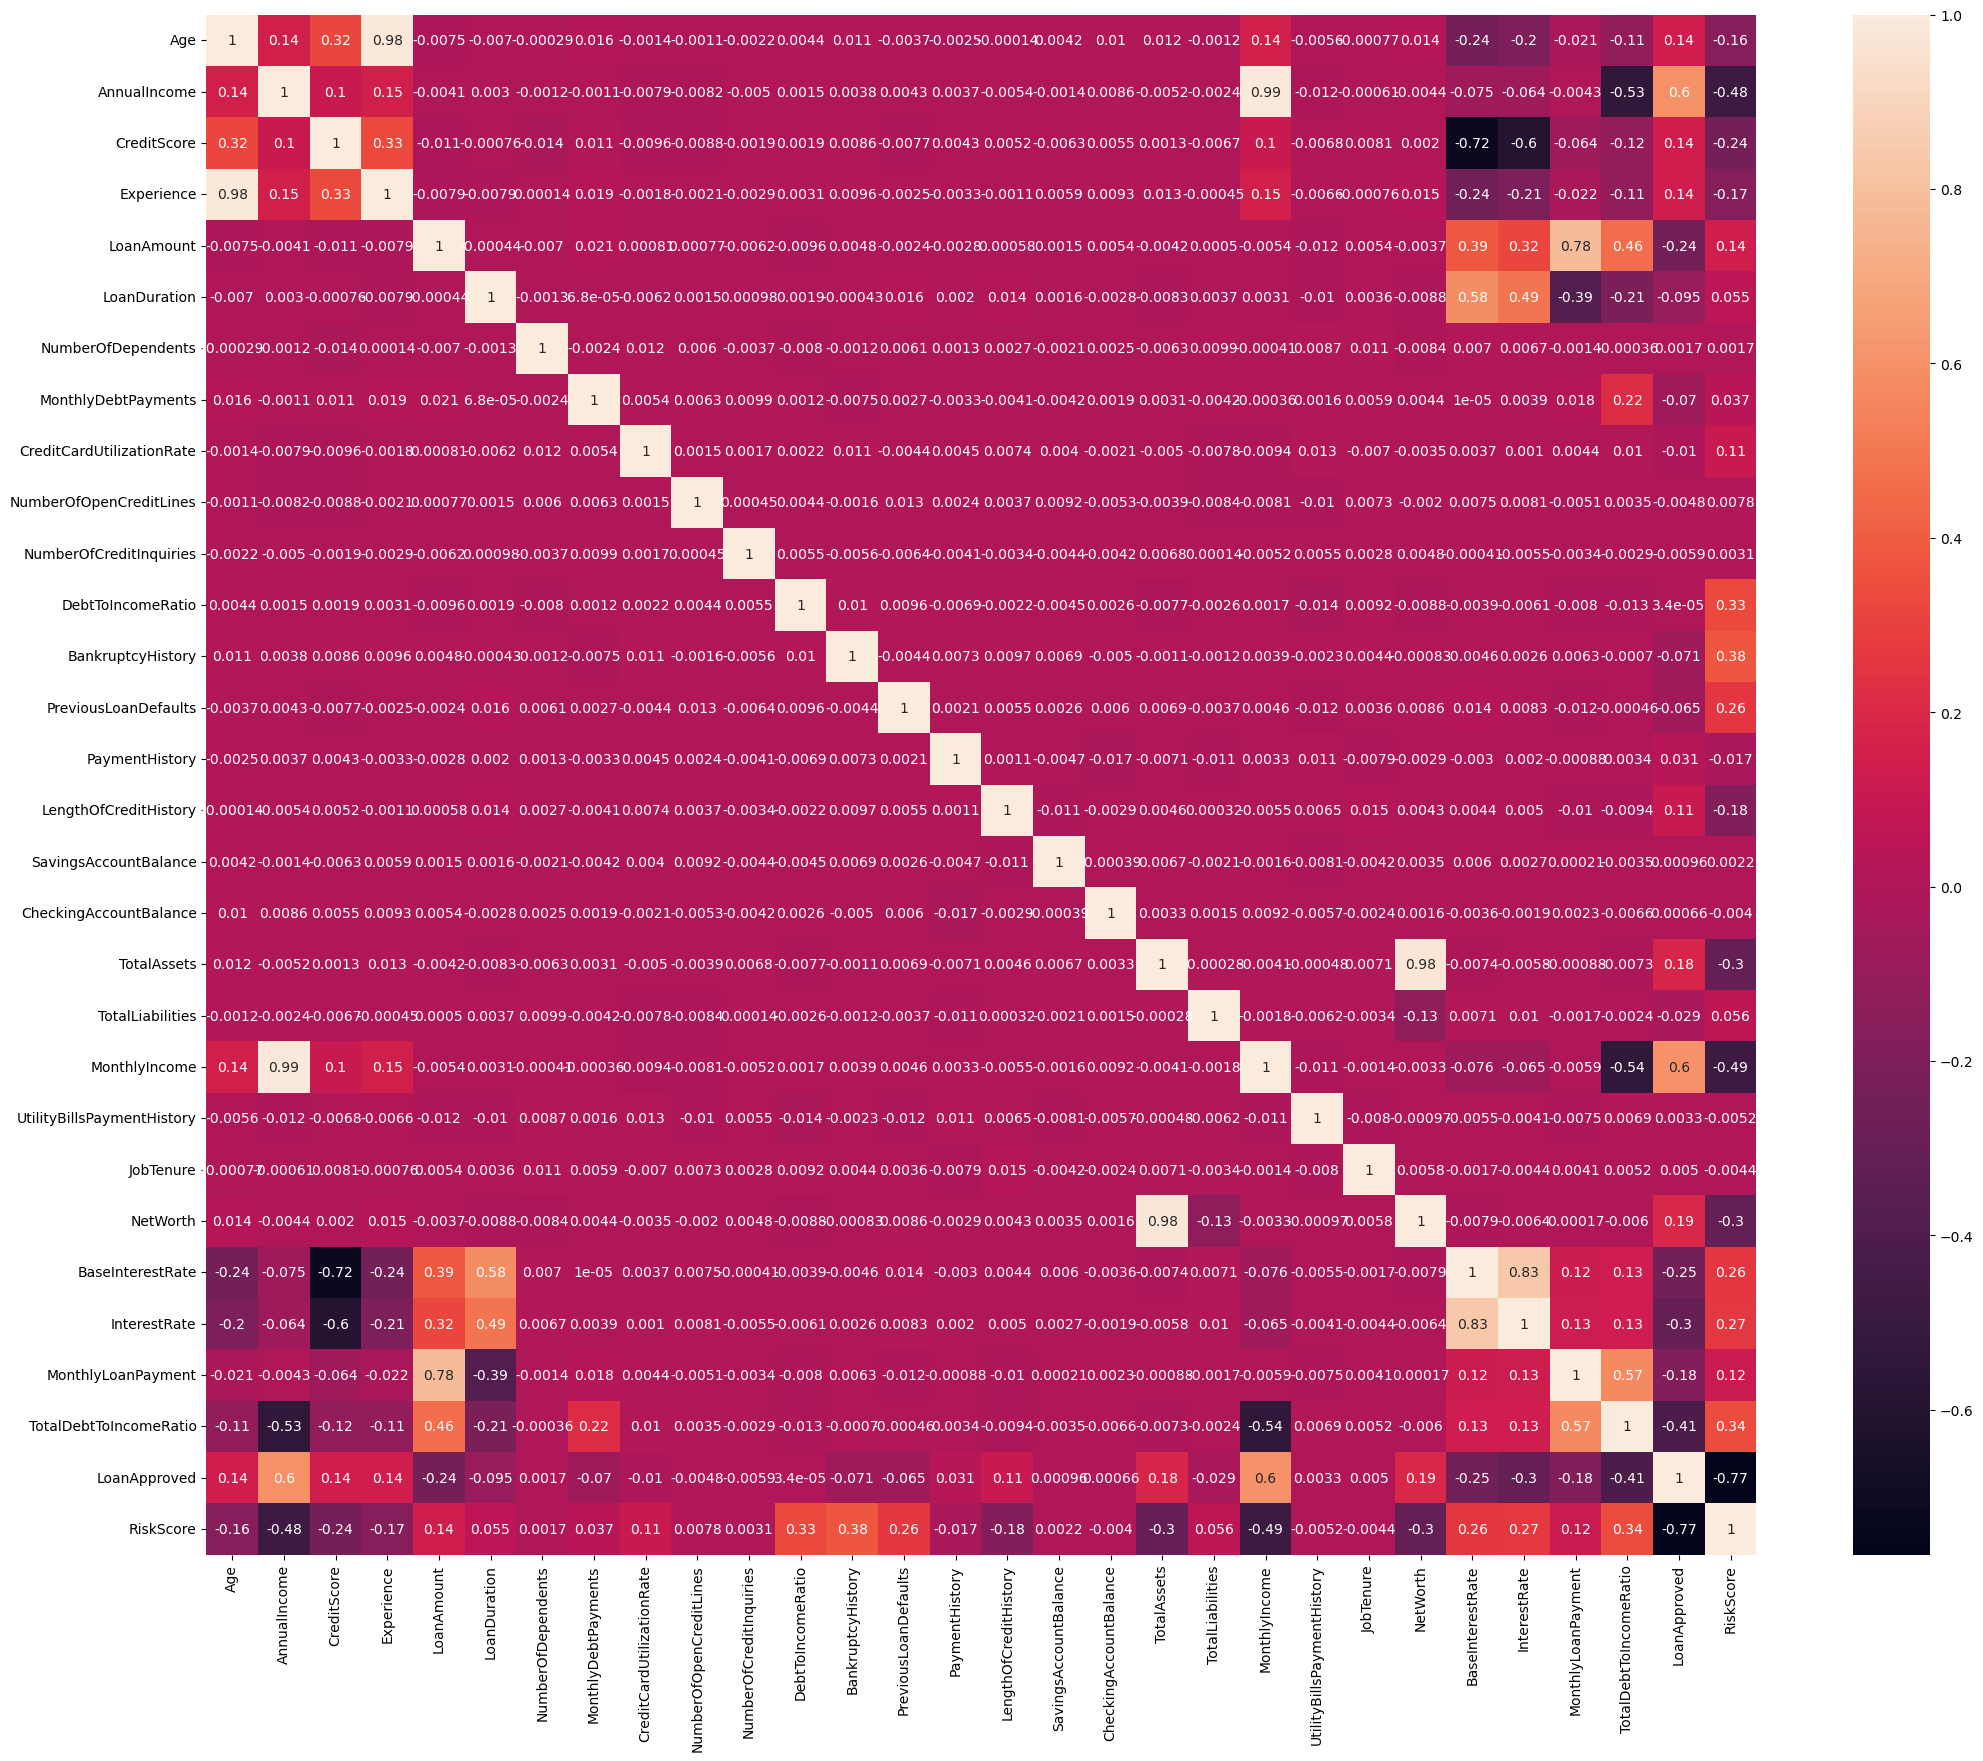

In [34]:
plt.figure(figsize=(25, 20))
sns.heatmap(df[numeric_features].corr(),annot=True)

In [46]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [51]:
## threshold--Domain expertise
corr_features=correlation(df[numeric_features],0.85)



In [52]:
## drop features where correlation is more than 0.85 
df.drop(corr_features,axis=1,inplace=True)
df.shape

(20000, 33)

In [36]:
df.columns=df.columns.str.strip()
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [39]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

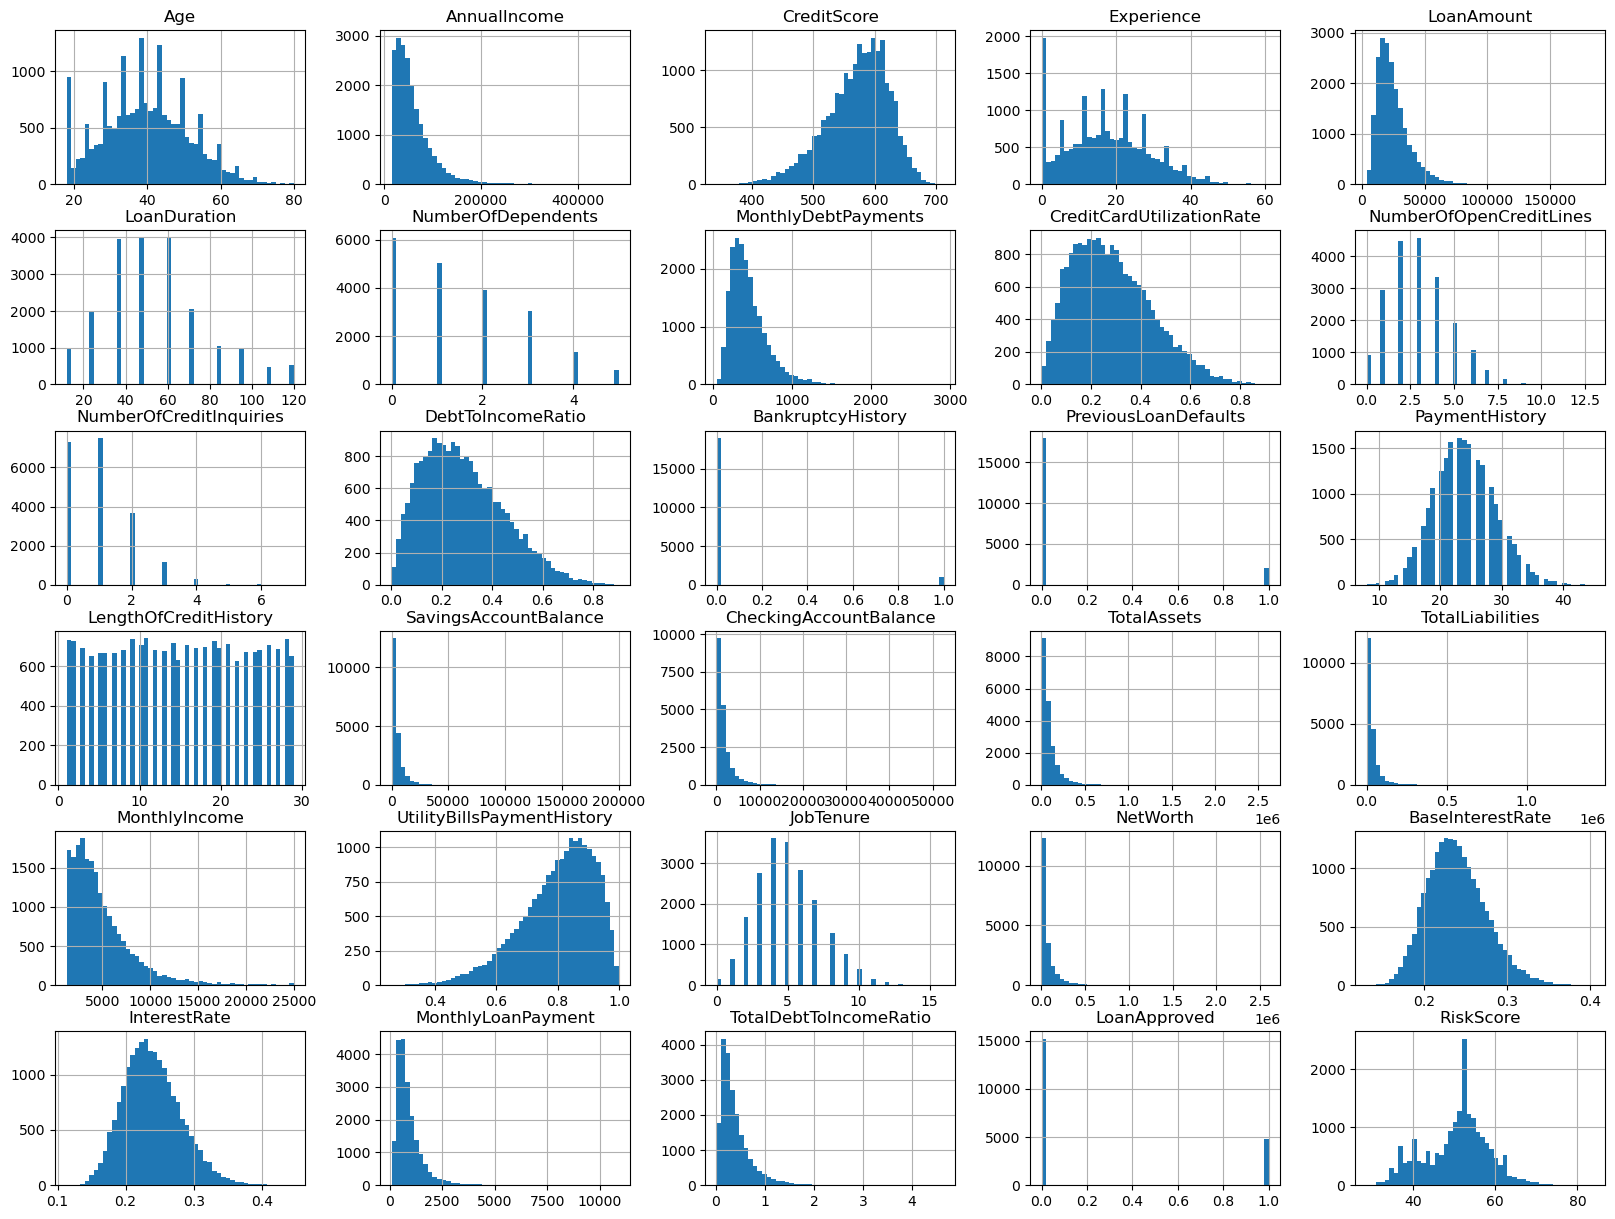

In [42]:
## Plot desnity plot for all features

df.hist(bins=50,figsize=(20,15))
plt.show()

In [43]:
## Percentage for Pie Chart
percentage=df['LoanApproved'].value_counts(normalize=True)*100   # normalize to get counts in percentage 

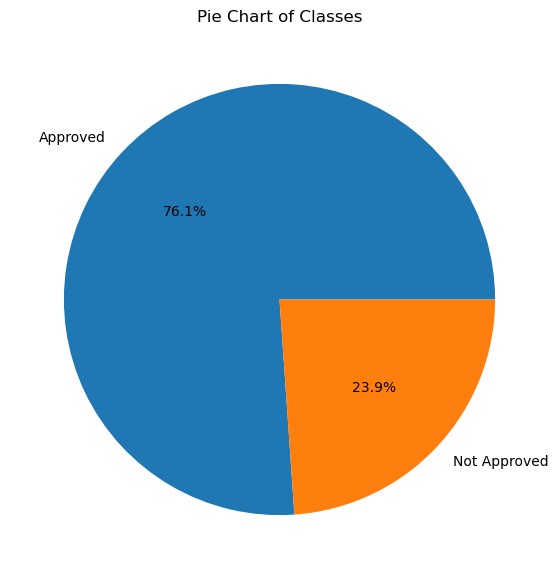

In [44]:
classlabels=["Approved","Not Approved"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

<Axes: ylabel='RiskScore'>

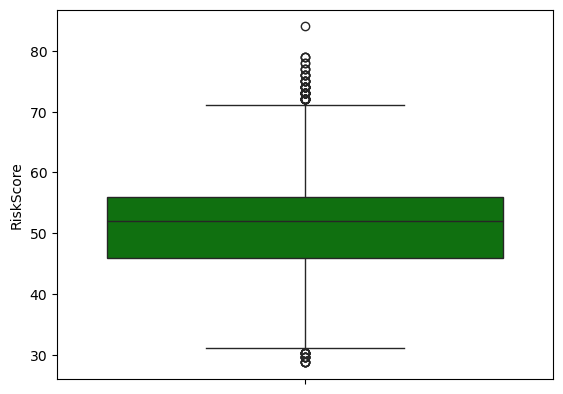

In [45]:
## Box Plots
sns.boxplot(df['RiskScore'],color='green')

#### Handling for Imblanced data

In [53]:
df['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [65]:
##upsampling
df_minority=df[df['LoanApproved']==1]
df_majority=df[df['LoanApproved']==0]
df_minority_upsampled=resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])



In [66]:

df_upsampled

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,13152,48,Married,2,...,146111,19183,0.724972,11,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,26045,48,Single,1,...,53204,9595,0.935132,3,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,17627,36,Married,2,...,25176,128874,0.872241,6,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,37898,96,Single,1,...,104822,5370,0.896155,5,0.300398,0.300911,1047.506980,0.313098,0,54.0
6,2018-01-07,58,51250,564,Employed,High School,12741,48,Married,0,...,65624,43894,0.884275,5,0.225741,0.205271,391.300352,0.170529,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,2043-11-27,39,80516,542,Employed,Master,11758,60,Single,3,...,28545,10201,0.642785,5,0.245758,0.253455,347.498707,0.101570,1,40.8
3872,2028-08-08,26,99785,498,Employed,Master,16106,60,Married,0,...,62238,30714,0.934843,5,0.272106,0.219179,444.078579,0.096818,1,43.2
19572,2071-08-03,44,34670,616,Employed,Bachelor,18368,48,Single,0,...,27450,14349,0.797432,4,0.205368,0.170271,530.267385,0.280450,1,41.6
10356,2046-05-10,45,72443,571,Self-Employed,Master,13064,48,Married,1,...,76513,35680,0.974299,8,0.222564,0.228931,417.955933,0.117768,1,44.0


In [67]:
new_data=df_upsampled.to_csv('updated_data.csv', index=False)